In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression



In [81]:
df = pd.read_csv('/content/btc.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [82]:
df.shape


(2713, 7)

In [105]:
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end,open-close,low-high,target
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1,8.529999,-15.752014,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1,32.419983,-43.755981,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1,29.307007,-43.302978,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1,-14.230988,-33.412994,0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1,9.263977,-19.244995,1


In [84]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


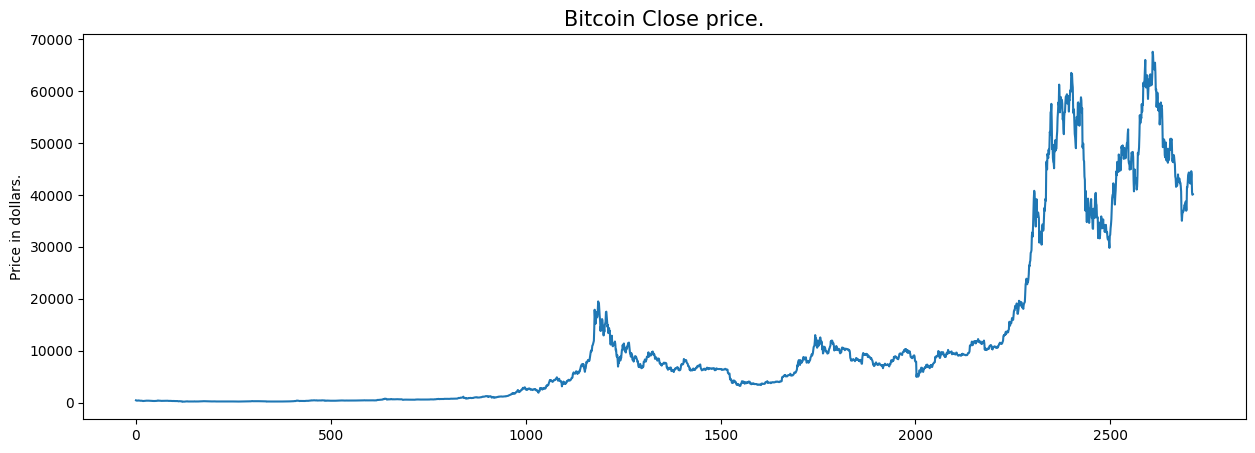

In [86]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [87]:
df[df['Close'] == df['Adj Close']].shape, df.shape


((2713, 7), (2713, 7))

In [88]:
df = df.drop(['Adj Close'], axis=1)


In [89]:
df.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


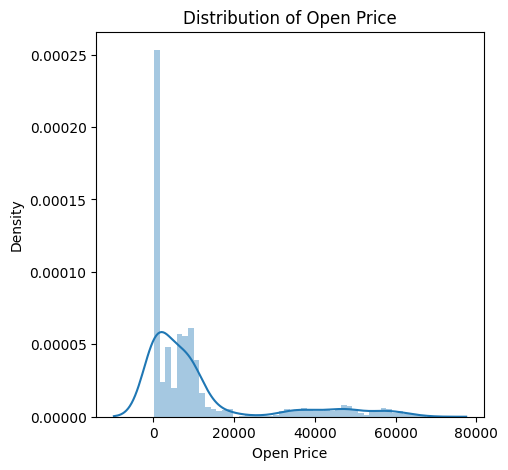

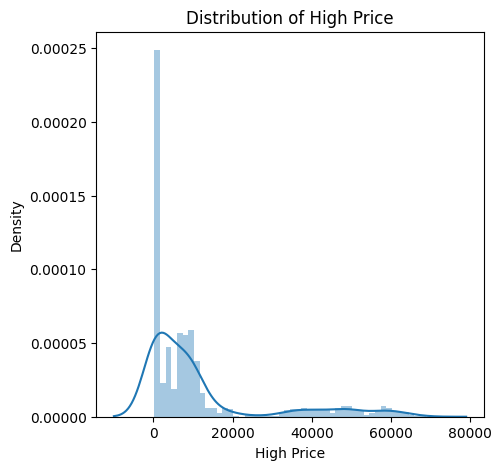

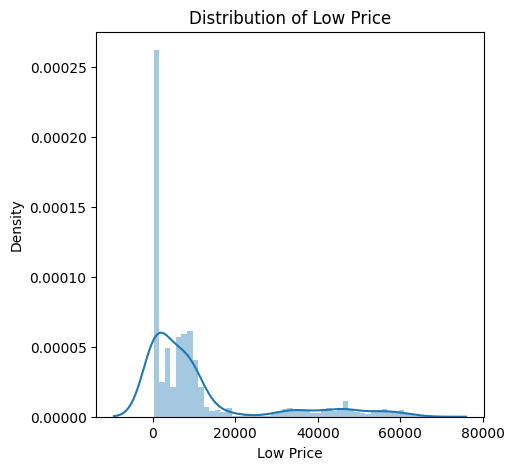

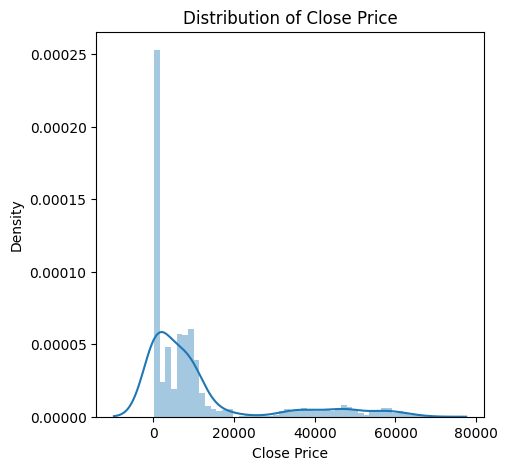

In [90]:
# Distribution of 'Open' price
plt.figure(figsize=(5, 5))
sb.distplot(df['Open'])
plt.title('Distribution of Open Price')
plt.xlabel('Open Price')
plt.ylabel('Density')
plt.show()

# Distribution of 'High' price
plt.figure(figsize=(5, 5))
sb.distplot(df['High'])
plt.title('Distribution of High Price')
plt.xlabel('High Price')
plt.ylabel('Density')
plt.show()

# Distribution of 'Low' price
plt.figure(figsize=(5, 5))
sb.distplot(df['Low'])
plt.title('Distribution of Low Price')
plt.xlabel('Low Price')
plt.ylabel('Density')
plt.show()

# Distribution of 'Close' price
plt.figure(figsize=(5, 5))
sb.distplot(df['Close'])
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.show()

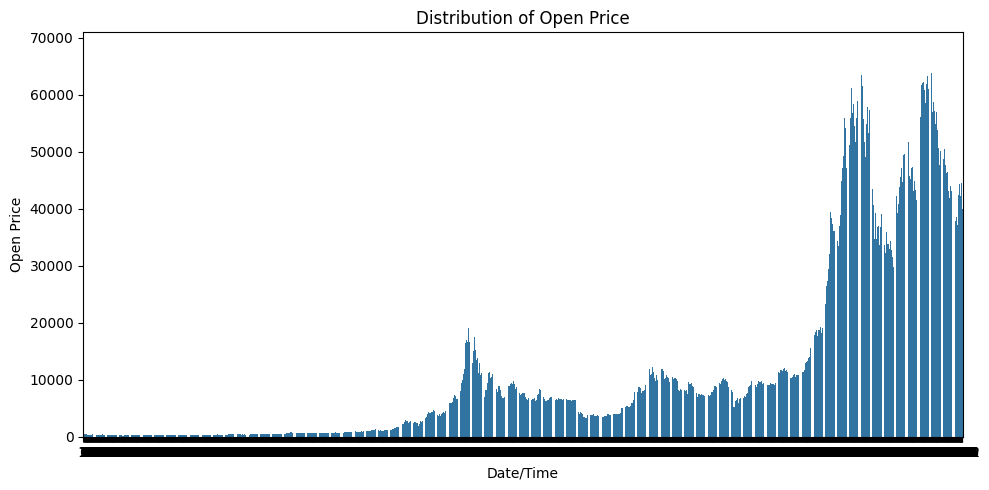

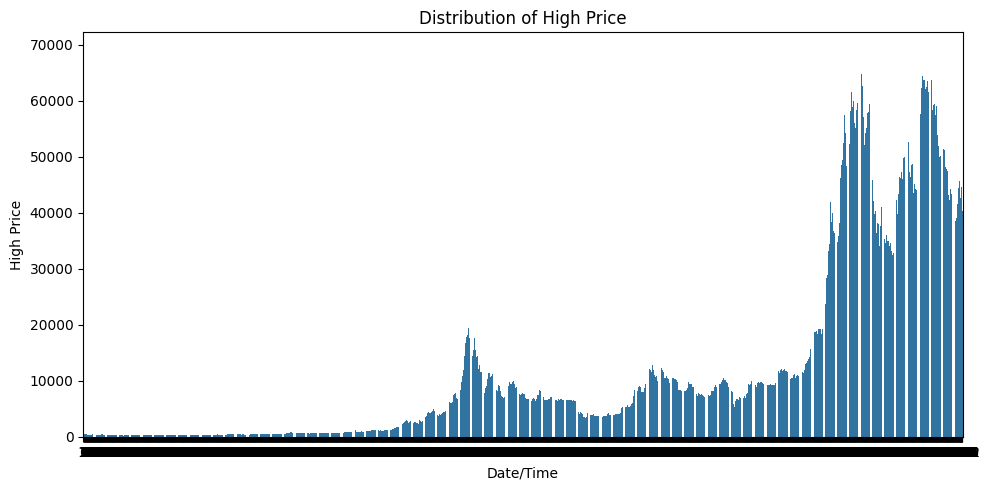

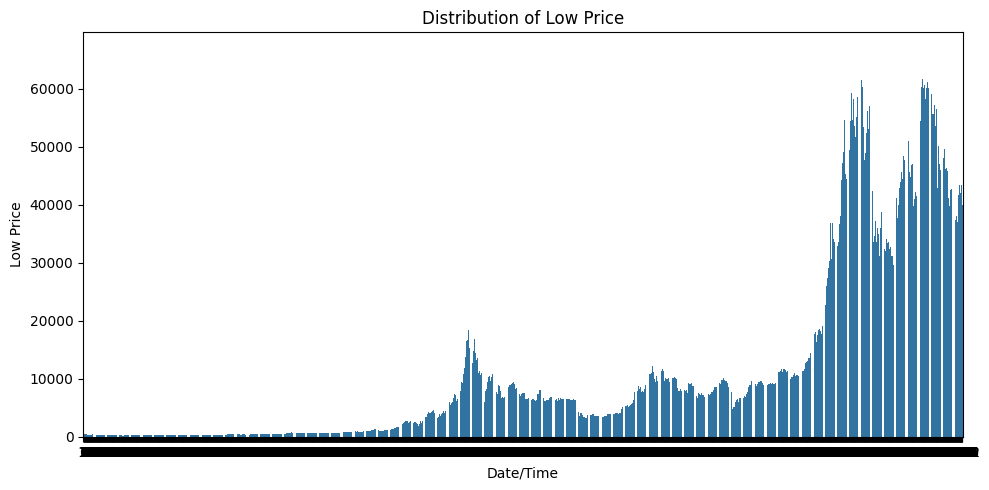

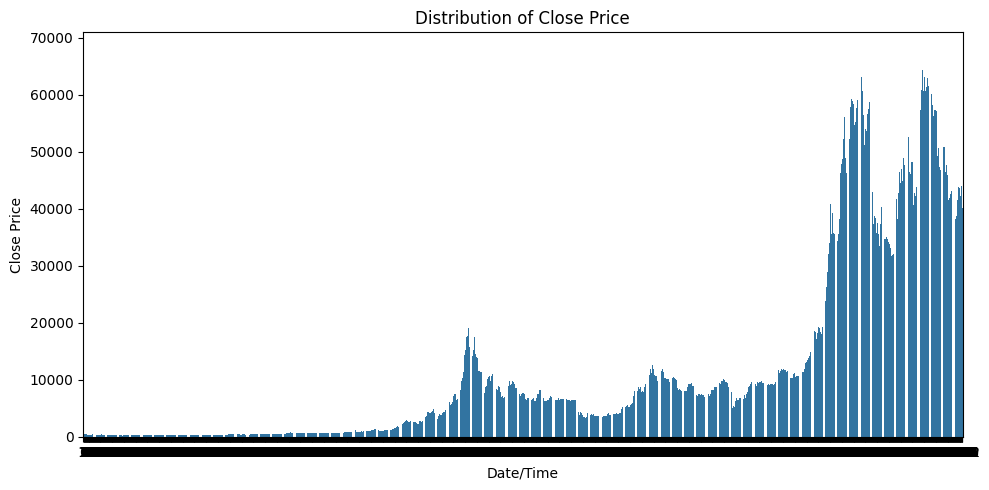

In [91]:
features = ['Open', 'High', 'Low', 'Close']

# Create separate bar plots for each feature
for feature in features:
    plt.figure(figsize=(10, 5))  # Adjust figure size as needed
    sb.barplot(x=df.index, y=df[feature])
    plt.title(f'Distribution of {feature} Price')
    plt.xlabel('Date/Time')  # Replace with appropriate x-axis label
    plt.ylabel(feature + ' Price')

    plt.tight_layout()
    plt.show()

In [93]:
splitted = df['Date'].astype(str).str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

df.head()


,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


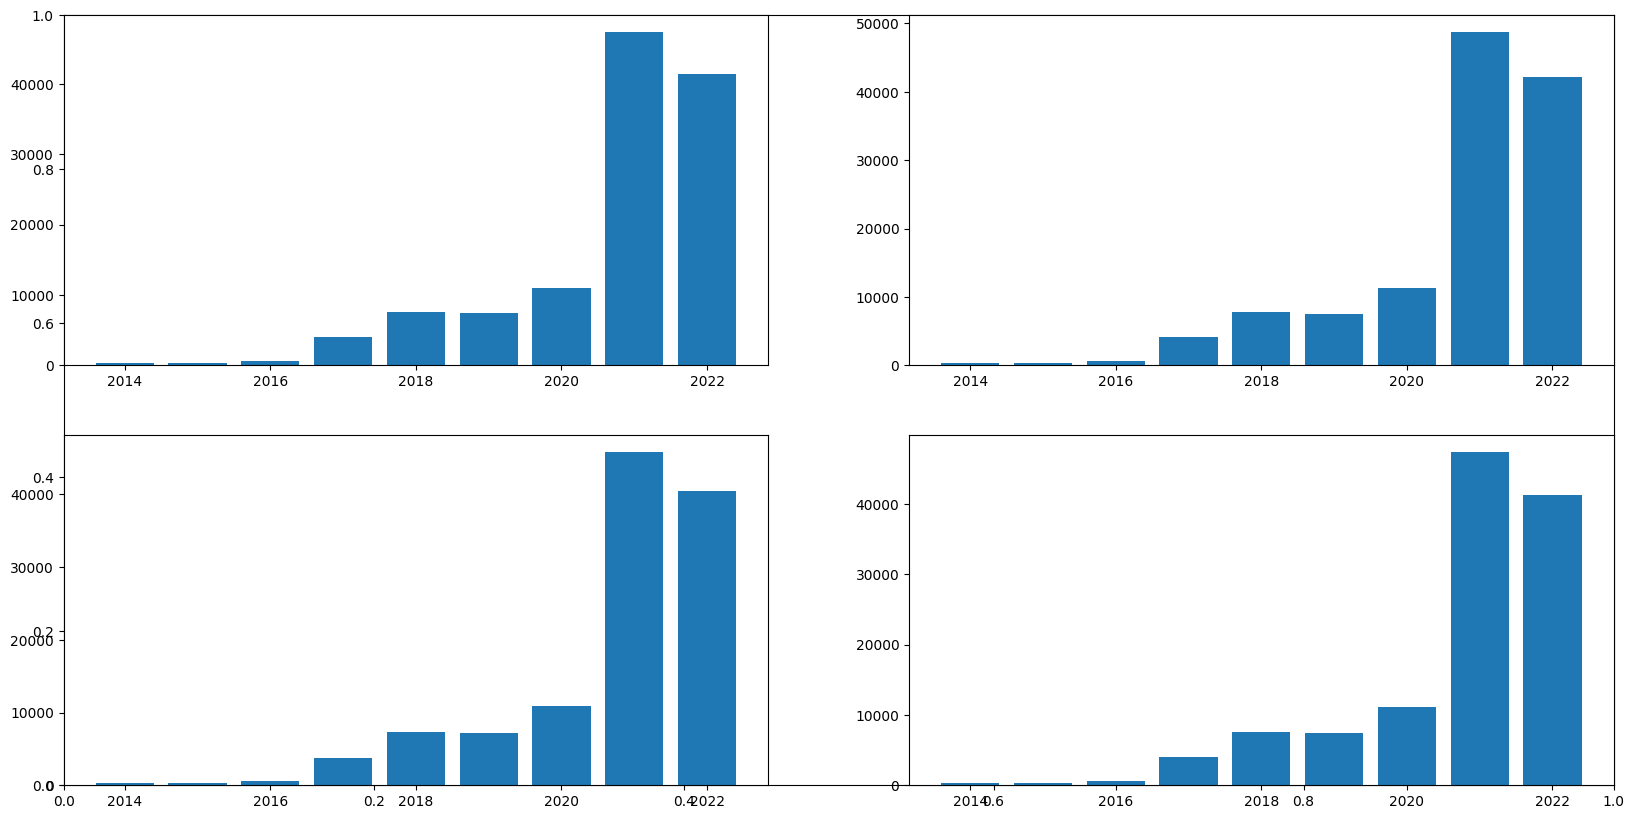

In [94]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  plt.bar(data_grouped.index, data_grouped[col])
plt.show()


In [95]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


In [96]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 'Probability of increased Price', 'Probability of decreased Price')


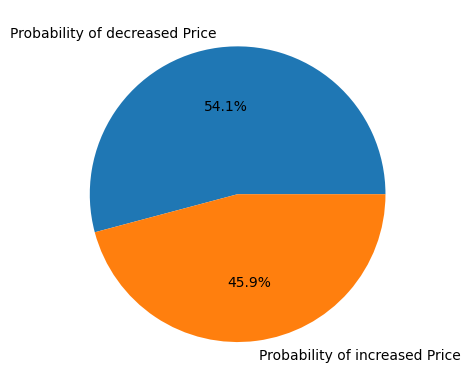

In [104]:
plt.pie(df['target'].value_counts().values,
        labels=[ 'Probability of decreased Price',  'Probability of increased Price'], autopct='%1.1f%%')
plt.show()


In [ ]:
# Analysis of the graphs and conclusion

# 1. Bitcoin Close Price Trend: The initial plot shows the overall trend of Bitcoin's closing price over time.  Observe for long-term upward or downward trends, significant price fluctuations, and periods of stability or volatility.  Look for potential correlations with external events (e.g., regulatory changes, market crashes).

# 2. Price Distributions: Histograms of 'Open', 'High', 'Low', and 'Close' prices reveal the distribution of these values.  Note if the distributions are normal, skewed, or multimodal.  Skewness might suggest potential price biases or market inefficiencies.

# 3. Bar Plots of Price Features:  These bar plots visualize price fluctuations over time.  They provide a granular view of how each feature ('Open', 'High', 'Low', 'Close') varies from day to day. Look for patterns, seasonality (e.g., higher prices during certain months), or significant spikes.

# 4. Yearly Price Averages: The grouped bar plots show average prices for each year.  Identify years of significant growth or decline. This allows analysis of long-term price trends and to establish whether there is consistent growth year-over-year.

# 5. Quarter-End Indicator: The 'is_quarter_end' feature helps assess if prices behave differently at quarter ends.  Look for noticeable patterns or anomalies in price changes. See if this feature is relevant to your goals.

# 6. Price Differences and Target Variable: The 'open-close' and 'low-high' columns and the 'target' variable suggest an attempt to predict price movement. The pie chart showing the distribution of the 'target' variable (1 for price increase, 0 for no increase) gives a baseline success rate.

# Conclusion:

# Summarize the findings from each of the visualizations.  For instance:
# * "Bitcoin prices show an overall upward trend with periods of significant volatility."
# * "The distribution of closing prices is slightly skewed to the right."
# * "Yearly average prices reveal consistent growth, with some exceptions."

# Recommendations:

# * **Further Analysis:** Consider more in-depth time series analysis (e.g., autocorrelation, moving averages) to understand price patterns better. Explore the relationship between price changes and relevant external factors.
# * **Feature Engineering:**  Explore other features that might be relevant for predicting price movements (e.g., trading volume, market sentiment, regulatory news). Consider more complex feature engineering.
# * **Model Improvement:** Experiment with different machine learning models beyond logistic regression. Use more advanced time series models to capture the dynamics of Bitcoin's price changes.
# * **Backtesting:** If aiming for price prediction, thoroughly backtest your model to assess its performance on historical data.  Validate the 'target' prediction.
# * **External Data:** Integrate additional datasets (e.g., macroeconomic indicators, social media sentiment) to enhance the model's predictive power.

# How it helps HR:

# Unless this analysis directly impacts HR metrics or decisions, the applicability might be limited.  Potential connections *could* be established in scenarios where:

# * **Investment Strategy:** If the company invests in cryptocurrency, this analysis can inform investment decisions.  HR may see this reflected in performance reviews, bonuses, or other compensation tied to corporate performance.
# * **Employee Benefits:** If considering adding crypto-related benefits (e.g., cryptocurrency education), the analysis can inform decisions.
# * **Talent Acquisition:**  Understanding market trends and predicting the potential growth or decline of the crypto industry can help tailor recruiting strategies to attract qualified candidates in this field.

# In most cases, unless the company is specifically involved in cryptocurrency trading or related fields, the project's insights are likely more relevant to finance or investment teams rather than HR. Be sure to discuss the business goals more clearly.
